In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda i: ast.literal_eval(i) if pd.notna(i) else i)

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

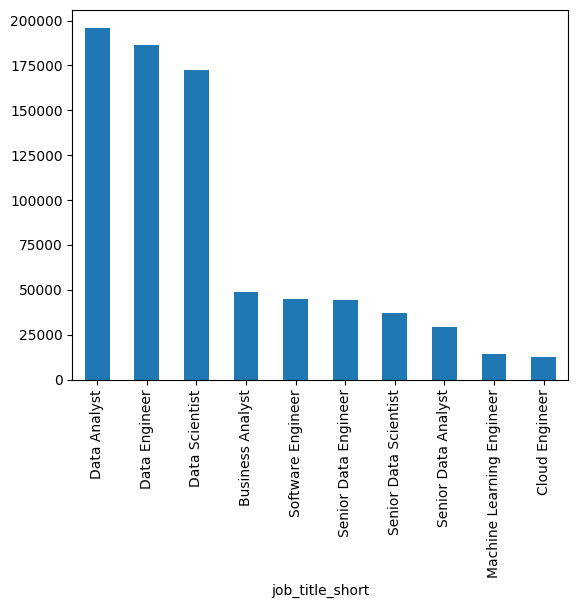

In [2]:
fig, ax=plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [3]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

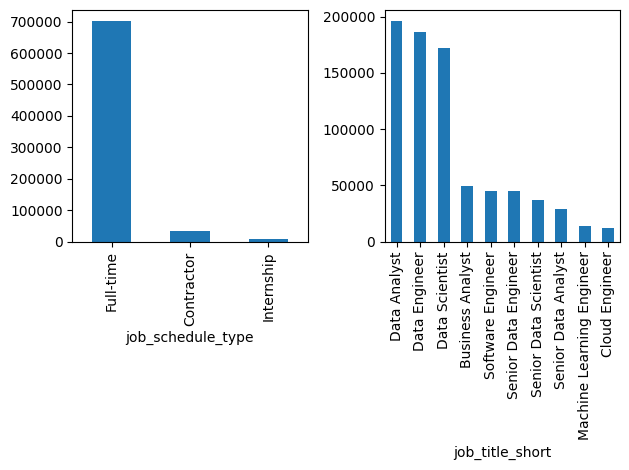

In [4]:
fig, ax=plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

## Example - Counts of Top Skills in Job Postings

In [5]:
df_skills=df.copy()
df_skills=df_skills.explode('job_skills')
skills_count=df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count=skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [6]:
job_titles=['Data Scientist', 'Data Engineer', 'Data Analyst']

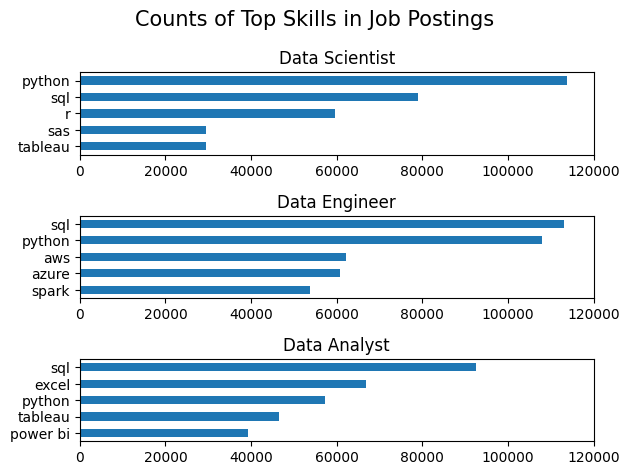

In [10]:
fig, ax=plt.subplots(3,1)


for i, job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
    
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()